In [ ]:
'''Business Problem:
  The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a
  better recommendation of the treadmills to the new customers.'''

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom,norm
import math

**Q1.Importing the dataset**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-08-17 17:21:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.94, 18.172.139.46, 18.172.139.210, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.3’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-08-17 17:21:20 (1.21 GB/s) - ‘aerofit_treadmill.csv?1639992749.3’ saved [7279/7279]



In [ ]:
df=pd.read_csv("/content/aerofit_treadmill.csv?1639992749")

**Checking structires & Characters**

In [ ]:
# There are 180 nos rows & 9 columns present in the data.
df.shape

(180, 9)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Here we can obsereve that there are no missing value present in the data & all the column having correct data type.
df.isnull().sum()


,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Checking if there any data duplicacy due to upper& lower case problem or present of spaces before & after
[print(i," : ",df[i].nunique()) for i in df.columns]

Product  :  3
Age  :  32
Gender  :  2
Education  :  8
MaritalStatus  :  2
Usage  :  6
Fitness  :  5
Income  :  62
Miles  :  37


[None, None, None, None, None, None, None, None, None]

In [ ]:
[print(i," : ",df[i].unique()) for i in df.columns]

Product  :  ['KP281' 'KP481' 'KP781']
Age  :  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender  :  ['Male' 'Female']
Education  :  [14 15 12 13 16 18 20 21]
MaritalStatus  :  ['Single' 'Partnered']
Usage  :  [3 2 4 5 6 7]
Fitness  :  [4 3 2 1 5]
Income  :  [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles  :  [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


[None, None, None, None, None, None, None, None, None]

**Detecting Outliers:**

In [ ]:
details=df.describe()
details

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Function to check outliers:
def outlier(the75thpercentile,the25thpercentile):
  IQR=the75thpercentile-the25thpercentile
  print("Uppervalue:",(the75thpercentile+1.5*IQR),"&", "Lowervalue:",(the25thpercentile-1.5*IQR))


In [ ]:
# Checking outliers for "Age": From the above describe function we can notice the 75 percentile is "33" & for 25 it is "24" .
#So any value outside of the range of 46.5 & 10.5 will be outlier for "Age".As we have min is 18, so range will be (46.5,18)
outlier(33,24)

Uppervalue: 46.5 & Lowervalue: 10.5


<Axes: ylabel='Age'>

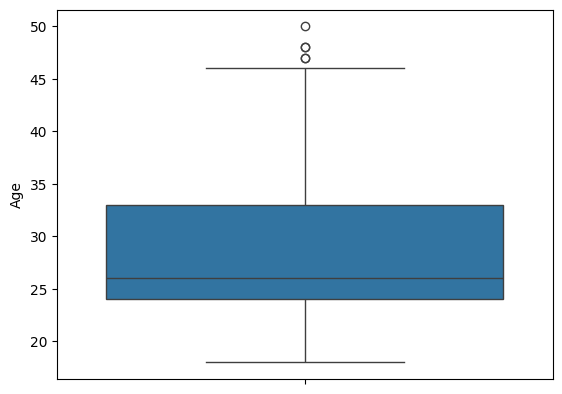

In [ ]:
sns.boxplot(df["Age"])

In [ ]:
# Checking outliers for "Education": From the above describe function we can notice the 75 percentile is "33" & for "16" it is "14" .
#So any value outside of the range of 19 & 11 will be outlier for "Education".As we have min is 12, so range will be (19,12)
outlier(16,14)

Uppervalue: 19.0 & Lowervalue: 11.0


<Axes: ylabel='Education'>

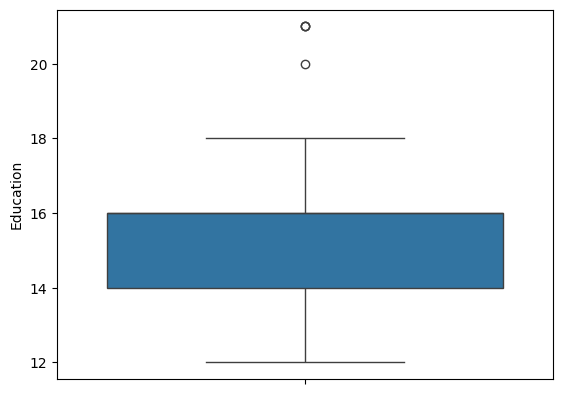

In [ ]:
sns.boxplot(df["Education"])

In [ ]:
# Checking outliers for "Usage": From the above describe function we can notice the 75 percentile is "4" & for 25 it is "3" .
#So any value outside of the range of 5.5 & 1.5 will be outlier for Usage.As we have min is 2, so range will be (5.5,2)
outlier(4,3)


Uppervalue: 5.5 & Lowervalue: 1.5


<Axes: ylabel='Usage'>

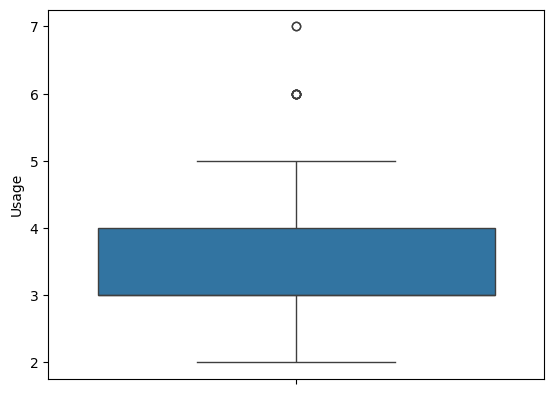

In [ ]:
sns.boxplot(data=df["Usage"])

In [ ]:
# Checking outliers for "Fitness": From the above describe function we can notice the 75 percentile is "4" & for 25 it is "3" .
#So any value outside of the range of 5.5 & 1.5 will be outlier for Usage.As we have min is 1, so range will be (5.5,1)
outlier(4,3)


Uppervalue: 5.5 & Lowervalue: 1.5


<Axes: ylabel='Fitness'>

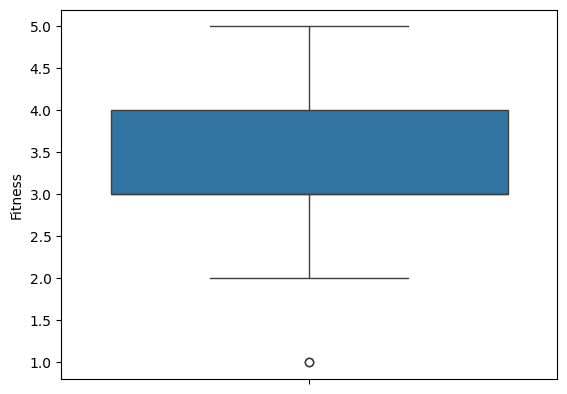

In [ ]:
sns.boxplot(df["Fitness"])

In [ ]:
# Checking outliers for "Income": From the above describe function we can notice the 75 percentile is 58868 & for 25 it is 44058.75 .
#So any value outside of the range of 81081.875 & 21844.875 will be outlier for Income. As we have min value is 29562, so the range will be (58868.44,29562).
outlier(58868,44058.75)

Uppervalue: 81081.875 & Lowervalue: 21844.875


<Axes: ylabel='Income'>

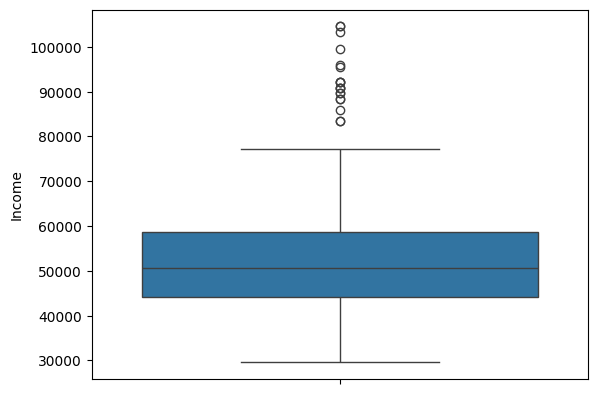

In [ ]:
sns.boxplot(data=df["Income"])

In [ ]:
# Checking outliers for "Miles": From the above describe function we can notice the 75 percentile is 114.75 & for 25 it is 66 .
#So any value outside of the range of 187.875 & -7.125 will be outlier for Miles. As we have min value is 21, So the range will be (187.875,21)
outlier(114.75,66)

Uppervalue: 187.875 & Lowervalue: -7.125


<Axes: ylabel='Miles'>

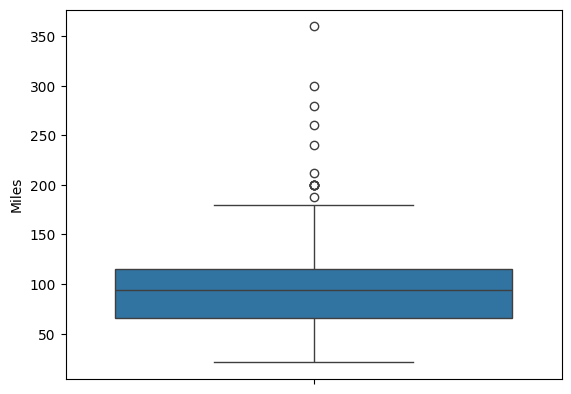

In [ ]:
sns.boxplot(df["Miles"])

**Removing Outlier:**

In [ ]:
df=df.loc[df["Age"].between(18,46.5) & df["Education"].between(12,19) & df["Usage"].between(2,5.5) & df["Fitness"].between(1,5.5) & df["Income"].between(29562,58868.44) &
          df["Miles"].between(21,187.875)]

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(129, 9)

**Q3:Checking if features like marital status, age have any effect on the product purchased**

 Checking with respect to marital status:

<Axes: xlabel='MaritalStatus', ylabel='count'>

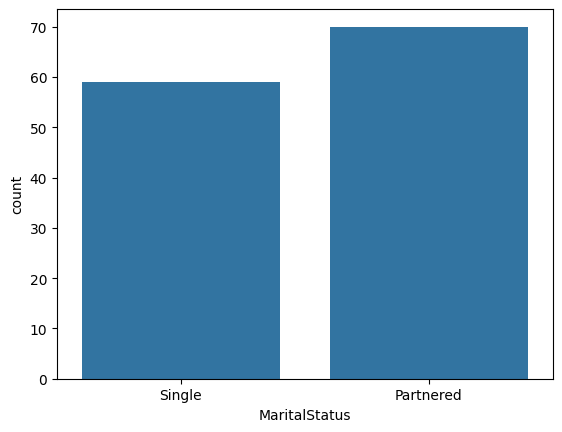

In [ ]:
# Here we can obsereve that for the overall purchase ,the married people have purchased more than the non-married people.
sns.countplot(x="MaritalStatus",data=df)

<Axes: xlabel='Product', ylabel='count'>

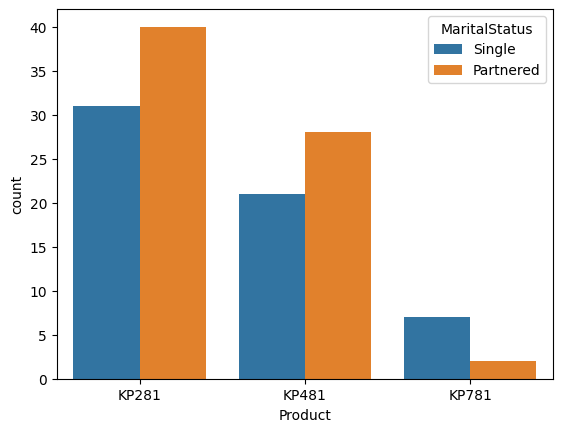

In [ ]:
# From the chart it can be inferred that :
# Product "KP281" that is entry level treadmill, the married people purchased more than the non-married one & it is the highest purchased product among three.
# Product "KP481" that is for mid-level runners, here also the married people purchased more than the non-married & it is the 2nd highest purchased product.
# Product "KP781" treadmill that is having advanced features, it is more purchased by non-married people than the married people.

sns.countplot(x="Product",hue="MaritalStatus",data=df)

**Checking with respect to age:**

<Axes: xlabel='Age', ylabel='Count'>

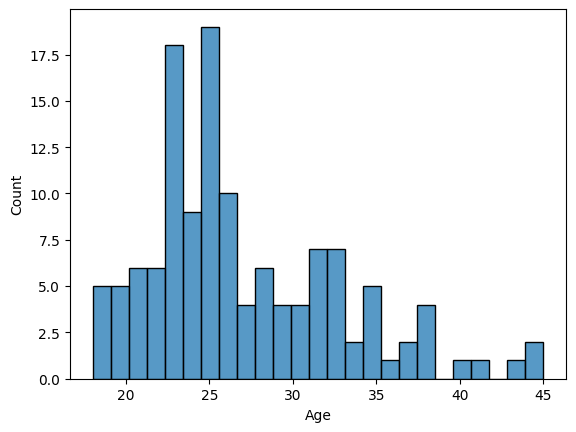

In [ ]:
# From the following graph it can be seen that the ages between 23 to 25 has highest no of purchase. But the ages around 33 , also have a good no of purchases among the other
# high ages.
sns.histplot(df["Age"],bins=25)

In [ ]:
df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 41, 43, 44, 40, 45])

In [ ]:
df["Age"].value_counts()

,count
Age,
25,19
23,18
26,10
24,9
33,7
21,6
22,6
28,6
20,5


<Axes: xlabel='Age', ylabel='count'>

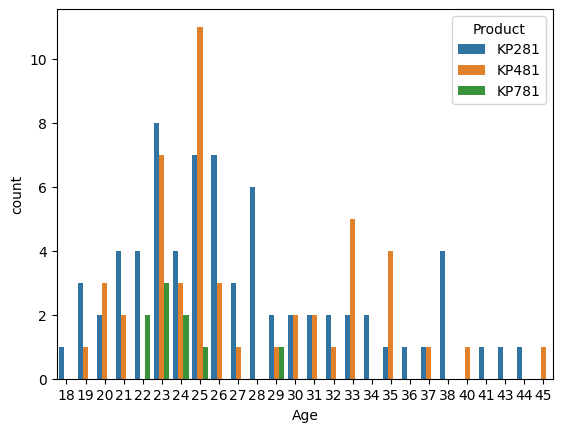

In [ ]:
# Here we can infer that :
''' Product "KP281": Among all ages of people have purchased this trademill & the overall purchase is also high.It may be its affordable price &
                    its target audience may be Beginners, casual users, and those with basic fitness needs
    Product "KP481" :Mostly around 25 & 23 aged people purchased.But seeing the overall distribution among all ages , it can be said that as there is no high difference
                     in price compare to the product "KP281",also with this little higher price it must have some extra feature compare to "KP281 &
                     its target audience may be Regular users, fitness enthusiasts, and those with intermediate fitness goals, thatswhy this product also purchased among all
                     ages people.
    Product "KP781": There is some interesting facts can be seen for this patrticular product.People with ages below 22 & above 29 have not purchased it.The reason behind this
                     may be it's price range is more higher than the previous two as it has advanced features & may be designed for the target audienceSerious runners, athletes,
                     and those with advanced fitness needs.
                    '''
sns.countplot(x="Age",hue="Product",data=df)

In [ ]:
df.loc[df["Product"]=="KP781","Age"]

,Age
140,22
141,22
143,23
144,23
145,23
147,24
149,24
150,25
165,29


In [ ]:
df["Product"].value_counts()

,count
Product,
KP281,71
KP481,49
KP781,9


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Q4:Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781**

In [ ]:
product_counts =(pd.crosstab(index=df['Product'], columns='count'))
Total_count=product_counts.sum()
marginal_probability=(100*product_counts/Total_count).reset_index()
marginal_probability.columns.name=None
marginal_probability.rename(columns={"Product":"product_purchased","count":"percentage_of_customers"},inplace=True)
marginal_probability


,product_purchased,percentage_of_customers
0,KP281,55.038760
1,KP481,37.984496
2,KP781,6.976744


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Q5: Check correlation among different factors using heat maps or pair plots**

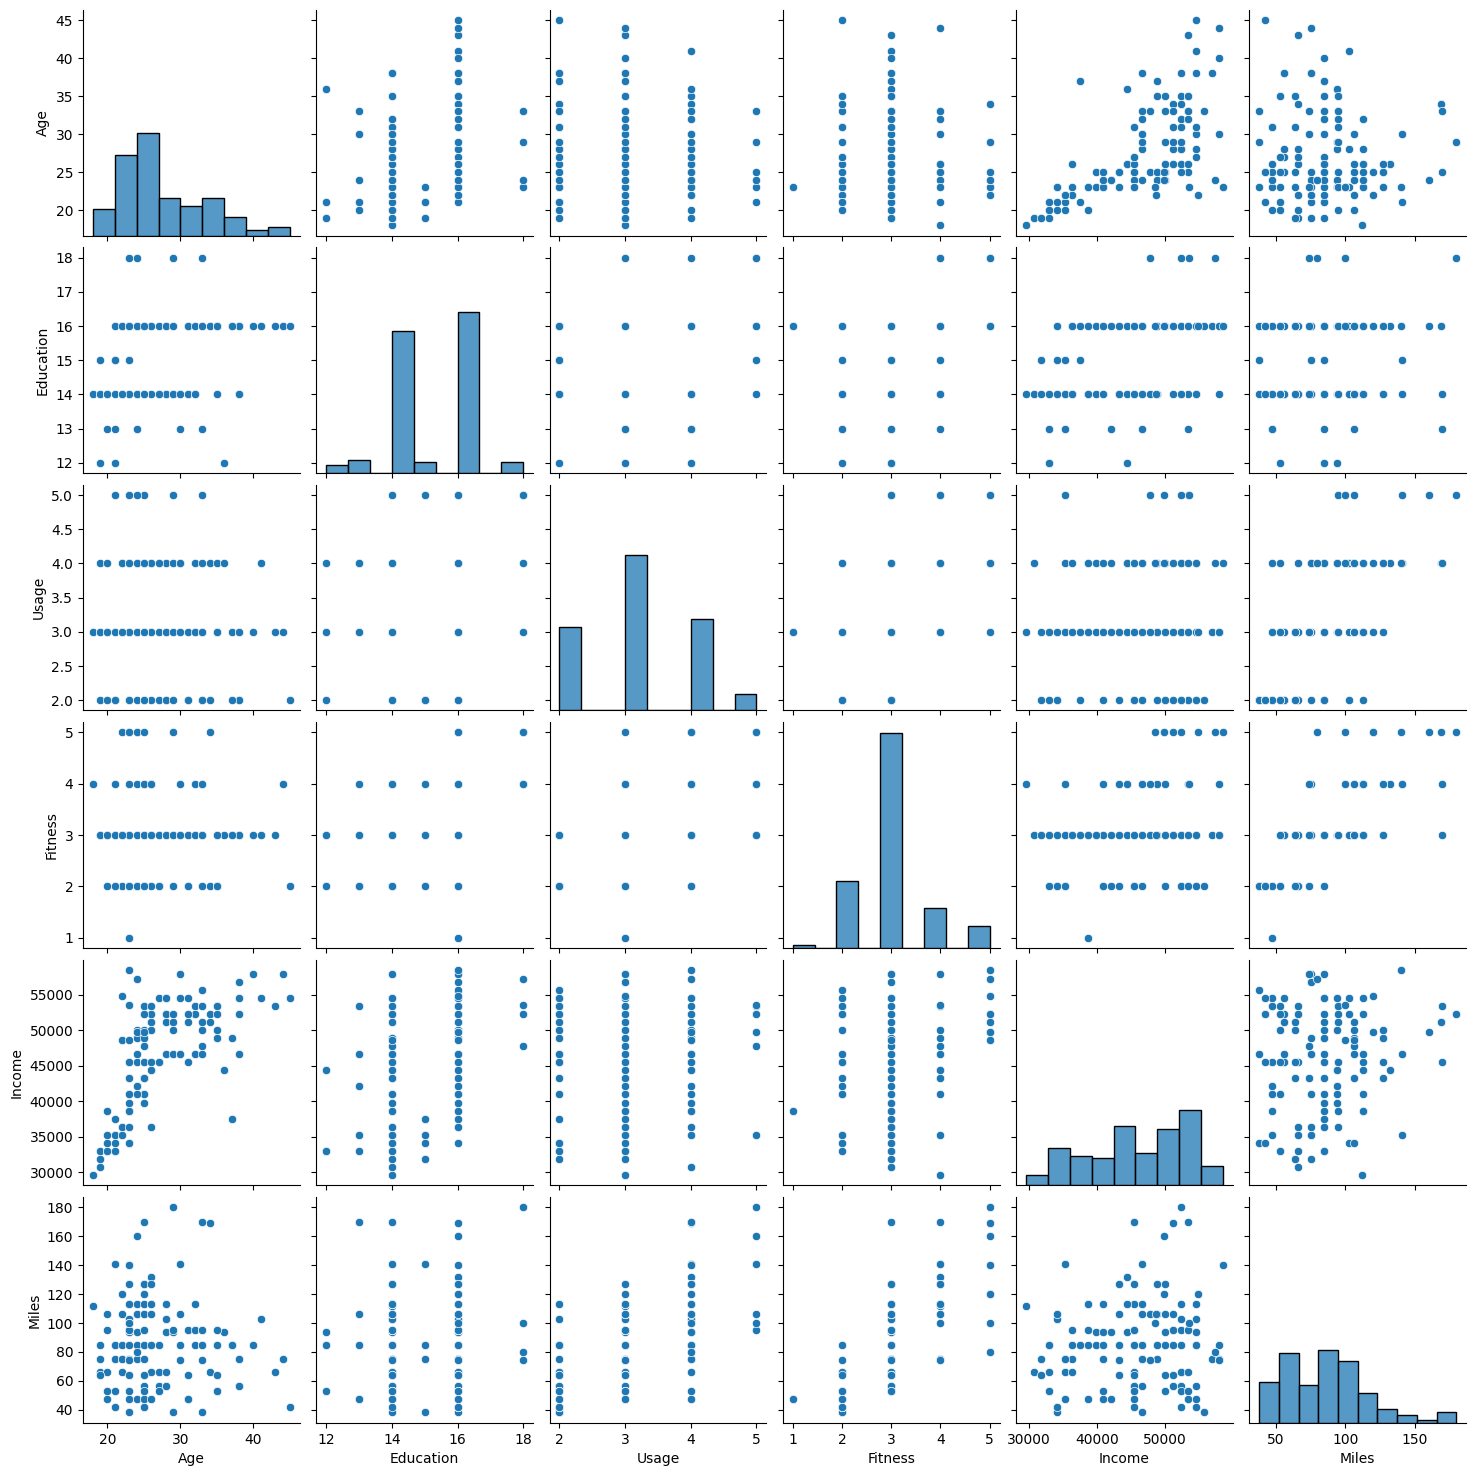

In [ ]:
sns.pairplot(data=df)

**Q6:What is the probability of a male customer buying a KP781 treadmill**

In [ ]:
# There are total 69 nos male & 60 nos female who have done the purchases.
Total_gender=df["Gender"].value_counts().reset_index()
Total_gender

,Gender,count
0,Male,69
1,Female,60


In [ ]:
Total_male=69
Total_female=60

In [ ]:
#SO the probability of a male customer buying a KP781 treadmill is 8/69=.115
count_of_product_for_malecustomer=df[df["Gender"]=="Male"]["Product"].value_counts().reset_index()
count_of_product_for_malecustomer["probability"]=count_of_product_for_malecustomer["count"]/Total_male
count_of_product_for_malecustomer

,Product,count,probability
0,KP281,36,0.521739
1,KP481,25,0.362319
2,KP781,8,0.115942


In [ ]:

count_of_product_for_femalecustomer=df[df["Gender"]=="Female"]["Product"].value_counts().reset_index()
count_of_product_for_femalecustomer["probability"]=count_of_product_for_femalecustomer["count"]/Total_female
count_of_product_for_femalecustomer

,Product,count,probability
0,KP281,35,0.583333
1,KP481,24,0.400000
2,KP781,1,0.016667


**Q7:Customer Profiling - Categorization of users**




**Age & Product**

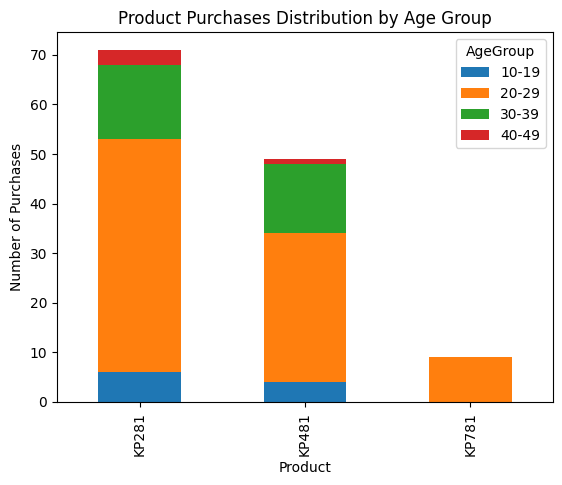

In [ ]:
# In this following graph we can clearly see that:
# Product "KP281" : Purchased among all age groups but mostly purchased by the age group of 20-29.
# Product "KP481": This product also sold in all age groups but mostly preferred by the age group of 29-29.
# Product "KP781": This product is only purchased by the age group of 29-29 for its advanced features which can be the right fit for
                   # Serious runners, athletes, and those with advanced fitness needs.

age_bins = [10, 20, 30, 40, 50]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=['10-19','20-29','30-39','40-49'])
age_product_distribution = pd.crosstab(df['Product'], df['AgeGroup'])
age_product_distribution.plot(kind='bar', stacked=True)
plt.ylabel('Number of Purchases')
plt.title('Product Purchases Distribution by Age Group')
plt.show()


**Income & Product:**

<Axes: xlabel='Product', ylabel='Income'>

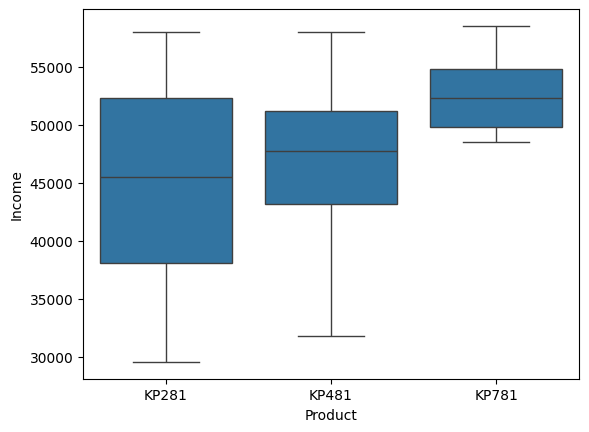

In [ ]:
# Here it can be obsereved that:
# Product "KP281" - 25% of its customers having income from 30k $ - (35k$-40k$) raneg & 50% of its customers lie between 30k$- slighly more than 45k$ & it
                  # has customer with higher income also.ider range of income levels, including slightly lower-income customers, while still being attractive
                  # to middle-income customers
# Product "KP481":25% of its customers having income from greater than 30k $ - less than 40k$ raneg & 50% of its customers lie between 30k$- less than 50k$ & it
                  # has customer with higher income also. As the median is close to each other so This similarity suggests that the typical income of customers
                  #purchasing both products is relatively similar

# Product "KP781": The chart for this product showing some speciality about the customers who have higher income mean only opt for this product.

sns.boxplot(y="Income",x="Product",data=df)

In [ ]:
#Customer Profiles:
'''Profile 1 : Young, Budget-Conscious User:
 Ages= Mostly 20-29 also distributed among all age groups.
 Income ranges= Applicable for all income groups from low to high

Profile 1: Regular Fitness Enthusiast
Ages= Mostly 20-29 but also distributed among all age groups.
 Income ranges=  Applicable for all income groups from low to high

Profile 3: Regular Fitness Enthusiast
Ages= Only 20-29 age group
 Income ranges=Applicable for only high income groups.'''

'Profile 1 : Young, Budget-Conscious User:\n Ages= Mostly 20-29 also distributed among all age groups.\n Income ranges= Applicable for all income groups from low to high\n\nProfile 1: Regular Fitness Enthusiast\nAges= Mostly 20-29 but also distributed among all age groups.\n Income ranges=  Applicable for all income groups from low to high\n\nProfile 3: Regular Fitness Enthusiast\nAges= Only 20-29 age group\n Income ranges=Applicable for only high income groups.'

**Q8:Probability- marginal, conditional probability**

In [ ]:
# There are total 69 male & 60 female customer who have done all the purchases.
# Out 69 male there are 36 are married & 33 are non-married.
   # Out of 36 married there are 21 nos are belonging in "20-29" age group,11 in "30-39" ,3 in "40-49" & remaining 1 in "10-19"
     # Age group-"10-19" : Out of 1 : "KP281"-1 nos,"KP-481"-0 nos & , "KP781" -0 nos
     # Age group-"20-29" : Out of 21 : "KP281"-9 nos,"KP-481"-10nos & , "KP781" -2 nos
     # Age group-"30-39" : Out of 11 : "KP281"-5 nos,"KP-481"-6 nos & , "KP781" -0 nos
     # Age group-"40-49" : Out of 3 : "KP281"-2 nos,"KP-481"-1 nos & , "KP781" -0 nos


    # Out of 33 Non-married there are "24" nos are belonging in "20-29" age group, "3" in "30-39" , "0" in "40-49" & "6" in "10-19"
      # Age group-"10-19" : Out of 6 : "KP281"-3 nos,"KP-481"-3 nos & , "KP781" -0 nos
      # Age group-"20-29" : Out of 24 : "KP281"-13 nos,"KP-481"-5 nos & , "KP781" - 6 nos
      # Age group-"30-39" : Out of 3 : "KP281"-3 nos,"KP-481"-0 nos & , "KP781" -0 nos
      # Age group-"40-49" : 0 nos

# SO NOW IF WE WANT TO CHECK THE CONDITIONAL PROBABILITY ON THE BASIS OF THE UPPER DATA THEN:
# PRODUCT KP281: Probability of purchase of this product for different conditions like:
    #  A person is male & married & in the age group of 10-19--- 1/1= 1
    '''A person is male & single & in the age group of 10-19--- 3/6= .5'''
    #  A person is male & married & in the age group of 20-29--- 9/21= .42
    '''A person is male & single & in the age group of 20-29--- 13/24= .54'''
    #  A person is male & married & in the age group of 30-39--- 5/11= .45
    '''A person is male & single & in the age group of 30-39--- 3/3= 1'''
    #  A person is male & married & in the age group of 40-49--- 2/3= .6
    '''A person is male & single & in the age group of 40-49--- 0'''
# PRODUCT KP481: Probability of purchase of this product for different conditions like:
    #  A person is male & married & in the age group of 10-19--- 0
    '''A person is male & single & in the age group of 10-19--- 3/6= .5'''
    #  A person is male & married & in the age group of 20-29--- 10/21= .47
    '''A person is male & single & in the age group of 20-29--- 5/24= .2'''
    #  A person is male & married & in the age group of 30-39--- 6/11= .54
    '''A person is male & single & in the age group of 30-39--- 0'''
    #  A person is male & married & in the age group of 40-49--- 1/3= .33
    '''A person is male & single & in the age group of 40-49--- 0'''
# PRODUCT KP781: Probability of purchase of this product for different conditions like:
    #  A person is male & married & in the age group of 10-19--- 0
    '''A person is male & single & in the age group of 10-19--- 0'''
    #  A person is male & married & in the age group of 20-29--- 2/21= .09
    '''A person is male & single & in the age group of 20-29--- 6/24= .25'''
    #  A person is male & married & in the age group of 30-39--- 0
    '''A person is male & single & in the age group of 30-39--- 0'''
    #  A person is male & married & in the age group of 40-49--- 0
    '''A person is male & single & in the age group of 40-49--- 0'''

#IN THE ABOVE CASE IT CAN INFERRED THAT FOR ALL AGEGROUPS & MARITAL STATUS WISE , HOW THE PURCHASING PROBABILITY DISTRIBUTED


In [ ]:
Total_gender=df["Gender"].value_counts().reset_index()
Total_gender

,Gender,count
0,Male,69
1,Female,60


In [ ]:
age_bins = [10, 20, 30, 40, 50]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=['10-19','20-29','30-39','40-49'])
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup
0,KP281,18,Male,14,Single,3,4,29562,112,10-19
1,KP281,19,Male,15,Single,2,3,31836,75,10-19
2,KP281,19,Female,14,Partnered,4,3,30699,66,10-19
3,KP281,19,Male,12,Single,3,3,32973,85,10-19
4,KP281,20,Male,13,Partnered,4,2,35247,47,10-19


In [ ]:
male=df[df["Gender"]=="Male"]
male["MaritalStatus"].value_counts()

,count
MaritalStatus,
Partnered,36
Single,33


In [ ]:
male_married=male[male["MaritalStatus"]=="Partnered"]
male_married["AgeGroup"].value_counts()

,count
AgeGroup,
20-29,21
30-39,11
40-49,3
10-19,1


In [ ]:
male_20_29=male_married[male_married["AgeGroup"]=="20-29"]

male_20_29["Product"].value_counts()

,count
Product,
KP481,10
KP281,9
KP781,2


In [ ]:
male_10_19=male_married[male_married["AgeGroup"]=="10-19"]

male_10_19["Product"].value_counts()

,count
Product,
KP281,1


In [ ]:
male_single=male[male["MaritalStatus"]=="Single"]
male_single["AgeGroup"].value_counts()

,count
AgeGroup,
20-29,24
10-19,6
30-39,3
40-49,0


In [ ]:
male_30_39=male_single[male_single["AgeGroup"]=="30-39"]

male_30_39["Product"].value_counts()

,count
Product,
KP281,3


In [ ]:
count_of_product_for_femalecustomer=df[df["Gender"]=="Female"]["Product"].value_counts().reset_index()
count_of_product_for_femalecustomer["probability"]=count_of_product_for_femalecustomer["count"]/Total_female
count_of_product_for_femalecustomer

,Product,count,probability
0,KP281,35,0.583333
1,KP481,24,0.400000
2,KP781,1,0.016667
